In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [73]:
european_countries = [
    "Albania", "Andorra", "Armenia", "Austria", "Azerbaijan", "Belarus", 
    "Belgium", "Bosnia and Herzegovina", "Bulgaria", "Croatia", "Cyprus", 
    "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Georgia", 
    "Germany", "Greece", "Hungary", "Iceland", "Ireland", "Italy", "Kazakhstan", 
    "Kosovo", "Latvia", "Liechtenstein", "Lithuania", "Luxembourg", "Malta", 
    "Moldova", "Monaco", "Montenegro", "Netherlands", "North Macedonia", "Norway", 
    "Poland", "Portugal", "Romania", "Russia", "San Marino", "Serbia", "Slovakia", 
    "Slovenia", "Spain", "Sweden", "Switzerland", "Turkey", "Ukraine", "United Kingdom", 
    "Vatican City"
]

df_europe = df[df['job_country'].isin(european_countries)].copy().dropna(subset='salary_year_avg')
job_titles = df_europe['job_title_short'].value_counts().index[:6].tolist()
df_job_titles = df_europe[df_europe['job_title_short'].isin(job_titles)] 
df_salary = df_job_titles.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending = False)
df_order = df_job_titles.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending = False).index.tolist()

df_order

['Senior Data Scientist',
 'Senior Data Engineer',
 'Data Scientist',
 'Data Engineer',
 'Data Analyst',
 'Machine Learning Engineer']

C:\Users\User\AppData\Local\Temp\ipykernel_15184\970480032.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_job_titles , x='salary_year_avg', y='job_title_short',order = df_order,palette = 'light:r')


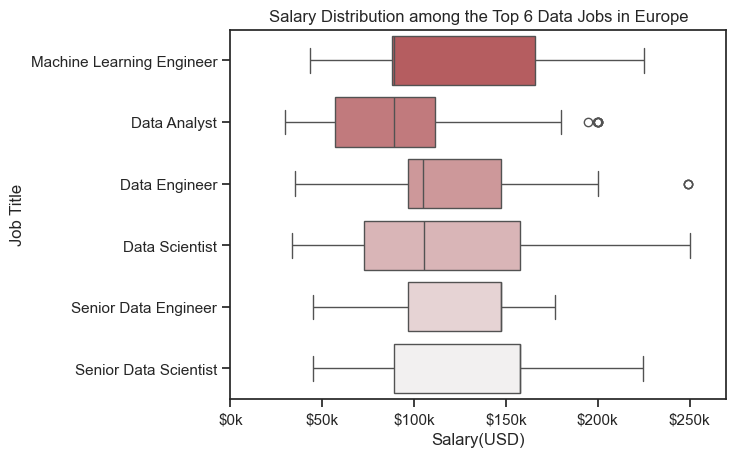

In [76]:
fig,ax = plt.subplots()
sns.boxplot(data = df_job_titles , x='salary_year_avg', y='job_title_short',order = df_order,palette = 'light:r')
sns.set_theme(style = 'ticks')
plt.xlim(0,270000)
plt.ylabel('Job Title')
plt.xlabel('Salary(USD)')
plt.title('Salary Distribution among the Top 6 Data Jobs in Europe')
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y / 1000)}k'))

ax = plt.gca().invert_yaxis()
